In [28]:
import pandas as pd 
import numpy as np

### Reading the data

In [29]:
twb_dataset = pd.read_excel('../data/Copy of twb-chatbot-data (1).xlsx')
transperfect_dataset = pd.read_excel('../data/Covid-Utterances-en_US.xlsx')

In [30]:
twb_dataset.head()

,ask_for_stats,covid_call_a_doctor,covid_disinfect,covid_explain_pandemic,covid_gloves,covid_hospital,covid_how_spread,covid_infection_sources,covid_masks_how_to,covid_masks_effectiveness,...,covid_protection_wash_hands,covid_protection_keep_distance,covid_risk_most_at_risk,covid_SARS,covid_stress,covid_symptoms,covid_treatments,covid_wash_hands_how,covid_what_is_corona_covid-19,covid_myth_hot_tea
0,What are the current COVID-19 statistics for DRC?,Where can I get tested?,Can disinfectant hurt me in any way?,What's a pandemic?,Should I wear gloves to protect against COVID?,Should I go to the hospital if I have corona?,How do people catch the virus?,I wanted to know the origin not the treatment,How should I wear a mask?,What kind of mask should I wear?,...,Why should you wash your hands?,Do I have to be away from people to avoid corona?,Why do whites die more than blacks?,Is corona SARS?,Are there any resources to help cope with stress?,What are the signs of Covid-19?,Do cold temperatures kill COVID-19?,Is sanitizer better than soap?,Are covid-19 and coronavirus the same thing?,It is also said that hot tea with ginger can c...
1,Statistics for DRC?,What should I do if I have symptoms?,Do I have to use disinfectant?,What's the difference between a pandemic and a...,Does wearing gloves help?,Do I need to visit a doctor if I have covid?,How do people catch the disease?,What is the origin of the coronavirus,Was your mask made here at home or from other ...,Anyone who wears a mask can't get a corona?,...,Why wash your hands?,How far should I be from people?,Why don't crazy people get coronavirus?,Is corona different from SARS?,How can I keep my mental health up during quar...,What are the symptoms,Has research found a cure for Covid-19?,Should I use sanitizer instead of soap?,Can you explain what coronavirus is?,"hot tea, can it treat corona"
2,What's the total number of people tested posit...,I have a dry cough and fever,Is drinking disinfectant bad for me?,What's the difference between a epidemic and a...,Will gloves protect me?,Should I just stay at home if i have the disease?,How can I catch the disease?,What country is COVID-19 from?,Do you have to wear a mask every day?,When does the mask help?,...,How should I wash my hands?\n,Should I be away from anyone?,Is the coronavirus more dangerous to some people?,How is the coronavirus different from SARS?,How do I deal with stress during quarantine?,What are the signs of being sick with coronavi...,Can people be cured of COVID-19?,How long should I wash my hands?,Can you explain what COVID-19 is?,If someone takes hot tea they will not be infe...
3,How many people have tested positive for coron...,Should I call a doctor?,Should I drink disinfectant?,Why is coronavirus called a pandemic?,Are gloves a good idea?,Is it okay to not go to the hospital if I have...,How does the disease spread?,Where does Corona come from?,How should you wear a mask?,Does the mask send missiles to catch the coron...,...,How to wash your hands,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,"If I am away from someone who is infected, I w...",Are there people more at risk of being harmed ...,Are there any differences between the coronavi...,What do I do against feeling stress during the...,Am I sick?,Is there anything that cures the corona virus?,What's the minimum time to wash hands?,Is COVID-19 and coronavirus the same?,Can I drink hot tea on the floor and not infec...,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [31]:
transperfect_dataset.head()

,1. covid_intro,2. covid_origin,3. symptoms_info,4. symtptoms_have,5. emergency_contact,6. precautions,7. current_numbers,8. medication,9. myths_hoaxes,10. how_spreading
0,Are corona virus and COVID-19 different?,Are Bats really the original cause of the viru...,Am I infected,Can the Corona virus cause fever?,Are there any emergency numbers for the corona...,"""Social distancing"" means maintaining a dista...",a corona virus mutates 100 x faster than influ...,"Are fruits, vegetables and herbs useful in fig...",Are Africans immune against covid-19,All outside contacts and physical proximity as...
1,are coronavirus and covid 19 the same,Can you explain how Covid19 started?,are coronavirus symptoms gradual,"Can the fever I have, cause body aches?",Are there any means of contact for Covid19 pat...,Are masks effective against covid?,a map of the spread of the corona virus,Are there any existing medications I can take ...,Are children under a certain age immune to the...,Are people around my dog at risk for corona vi...
2,are coronaviruses common,Can you explain how the virus started?,are covid-19 antibody tests available yet,Can you tell me if having difficulties to brea...,Are there any other ways besides email or phon...,Are masks important during the Covid19 virus o...,a star singapore corona virus test,Are there any medicinal teas to help against t...,are coronavirus victims getting younger,Ask around how covid-19 can be transmited.
3,are coronaviruses seasonal,Can you explain how this virus came into exist...,are covid-19 stimulus checks taxable,Can you tell me if my coughing and sneezing ar...,Are there doctor numbers listed?,Are masks the only option for preventing Covid19?,Amount of people infected,Are there any Natural remedies that are effect...,Are young people immune to COVID-19?,Can animals spread covid-19?
4,can covid-19 mutate,Can you explain to me how the virus started?,Are COVID-19 symptoms similar to that of the flu?,Can you tell me if my difficulty to breathe is...,Are these the only numbers available in case o...,Are there any way to stop corona virus,Are all the countries in the world infected wi...,Are there medicines that make the virus more a...,Can a mosquito spread the Corona virus with it...,Can animals spread the covid-19 virus?


In [32]:
print(transperfect_dataset.shape, twb_dataset.shape)

(547, 10) (35, 25)


Here we can conclude that our dataset comes as a tabular form the first one has , the twb dataset has 547 row and 10 colums and the twbdataset has 35 colums.

let convert the dataset in the format readable to a machine learning model , the sentence will be be put in one colum and the second will be the intent ..

In [33]:
twb_dataset = pd.melt(twb_dataset, var_name='Intent', value_name='Question')

In [34]:
twb_dataset = twb_dataset[twb_dataset.Question.notna()]

In [35]:
twb_dataset.head()

,Intent,Question
0,ask_for_stats,What are the current COVID-19 statistics for DRC?
1,ask_for_stats,Statistics for DRC?
2,ask_for_stats,What's the total number of people tested posit...
3,ask_for_stats,How many people have tested positive for coron...
4,ask_for_stats,"If I am away from someone who is infected, I w..."


After doing some manipulation we have the dataset in the long format , with 2 columns one is the intent and the other one is the questions , and This is in the type \X, \Y format where the X is the question and the Y is the intent , this format is more suistable for any supervised machine learning technics.



We can do the same for the transperfect dataset to prefor the same operation on the twb dataset ...

In [36]:
transperfect_dataset = pd.melt(transperfect_dataset, var_name='Intent', value_name='Question')

In [37]:
transperfect_dataset = transperfect_dataset[transperfect_dataset.Question.notna()]

In [38]:
transperfect_dataset.shape

(2498, 2)

In [39]:
transperfect_dataset.head()

,Intent,Question
0,1. covid_intro,Are corona virus and COVID-19 different?
1,1. covid_intro,are coronavirus and covid 19 the same
2,1. covid_intro,are coronaviruses common
3,1. covid_intro,are coronaviruses seasonal
4,1. covid_intro,can covid-19 mutate


At this stage we have 2 differents datasets with labels ready for a machine learning task, we can start doing our NLP preprocessing , 

But before moving futher, let see if there are any similar column between the dataset ...

In [40]:
transperfect_dataset.Intent.value_counts()

7. current_numbers      547
3. symptoms_info        323
2. covid_origin         247
1. covid_intro          246
10. how_spreading       241
6. precautions          212
8. medication           194
5. emergency_contact    183
4. symtptoms_have       175
9. myths_hoaxes         130
Name: Intent, dtype: int64

In [41]:
twb_dataset.Intent.value_counts()

covid_treatments                  33
covid_symptoms                    25
ask_for_stats                     25
covid_protection                  21
covid_gloves                      19
covid_masks_effectiveness         17
covid_infection_sources           14
covid_masks_how_to                13
covid_what_is_corona_covid-19     10
covid_call_a_doctor               10
covid_myth_hot_tea                10
covid_risk_most_at_risk            9
covid_protection_wash_hands        9
covid_how_spread                   9
covid_hospital                     8
covid_wash_hands_how               7
covid_myth_antibiotics             7
covid_myth_UV                      7
covid_myth_only_old                7
covid_myth_mosquitos               7
covid_stress                       6
covid_SARS                         6
covid_explain_pandemic             6
covid_disinfect                    6
covid_protection_keep_distance     5
Name: Intent, dtype: int64

### Text Preprocessing 

In the following section we will perform text preprocessing for our both dataset and at the end of this section we will have our cleaned dataset were we can perform any datascience task.

We will use Spacy and NlTk package , here are the steps we will perform in this stage...

- Contraction removal , we will remove contraction words and replace what's == >  what is , it's == > it is , don't ==> do not , etc
-  The first step will be tokenization: this will consist of splitting each sentence into token, or word
-  Stemming or lemmatization will consist of replacing each word or token with their root word or word they derived.
-  Stop word removal
-  Spell checking  : here we will check words that are misspelled and correct them with the correction.
- We can also add name entity recognition techniques to detect entities such as person names and countries.

In [42]:
#! python -m spacy download en_core_web_sm

In [43]:
import spacy 
import nltk
import re
nlp = spacy.load('en_core_web_sm', parse = True, tag=True, entity=True)
from nltk.corpus import stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /Users/es.py/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

### Removing contractions 

From [this](https://towardsdatascience.com/a-practitioners-guide-to-natural-language-processing-part-i-processing-understanding-text-9f4abfd13e72) blog we can read :
Contractions are shortened version of words or syllables. They often exist in either written or spoken forms in the English language. These shortened versions or contractions of words are created by removing specific letters and sounds. In case of English contractions, they are often created by removing one of the vowels from the word. Examples would be, do not to don’t and I would to I’d. Converting each contraction to its expanded, original form helps with text standardization.


Thans to this repo, becasuse from [this](https://github.com/dipanjanS/practical-machine-learning-with-python/blob/master/bonus%20content/nlp%20proven%20approach/contractions.py) we can find list of all contraction s

In [44]:
CONTRACTION_MAP = {
"ain't": "is not",
"aren't": "are not",
"can't": "cannot",
"can't've": "cannot have",
"'cause": "because",
"could've": "could have",
"couldn't": "could not",
"couldn't've": "could not have",
"didn't": "did not",
"doesn't": "does not",
"don't": "do not",
"hadn't": "had not",
"hadn't've": "had not have",
"hasn't": "has not",
"haven't": "have not",
"he'd": "he would",
"he'd've": "he would have",
"he'll": "he will",
"he'll've": "he he will have",
"he's": "he is",
"how'd": "how did",
"how'd'y": "how do you",
"how'll": "how will",
"how's": "how is",
"I'd": "I would",
"I'd've": "I would have",
"I'll": "I will",
"I'll've": "I will have",
"I'm": "I am",
"I've": "I have",
"i'd": "i would",
"i'd've": "i would have",
"i'll": "i will",
"i'll've": "i will have",
"i'm": "i am",
"i've": "i have",
"isn't": "is not",
"it'd": "it would",
"it'd've": "it would have",
"it'll": "it will",
"it'll've": "it will have",
"it's": "it is",
"let's": "let us",
"ma'am": "madam",
"mayn't": "may not",
"might've": "might have",
"mightn't": "might not",
"mightn't've": "might not have",
"must've": "must have",
"mustn't": "must not",
"mustn't've": "must not have",
"needn't": "need not",
"needn't've": "need not have",
"o'clock": "of the clock",
"oughtn't": "ought not",
"oughtn't've": "ought not have",
"shan't": "shall not",
"sha'n't": "shall not",
"shan't've": "shall not have",
"she'd": "she would",
"she'd've": "she would have",
"she'll": "she will",
"she'll've": "she will have",
"she's": "she is",
"should've": "should have",
"shouldn't": "should not",
"shouldn't've": "should not have",
"so've": "so have",
"so's": "so as",
"that'd": "that would",
"that'd've": "that would have",
"that's": "that is",
"there'd": "there would",
"there'd've": "there would have",
"there's": "there is",
"they'd": "they would",
"they'd've": "they would have",
"they'll": "they will",
"they'll've": "they will have",
"they're": "they are",
"they've": "they have",
"to've": "to have",
"wasn't": "was not",
"we'd": "we would",
"we'd've": "we would have",
"we'll": "we will",
"we'll've": "we will have",
"we're": "we are",
"we've": "we have",
"weren't": "were not",
"what'll": "what will",
"what'll've": "what will have",
"what're": "what are",
"what's": "what is",
"what've": "what have",
"when's": "when is",
"when've": "when have",
"where'd": "where did",
"where's": "where is",
"where've": "where have",
"who'll": "who will",
"who'll've": "who will have",
"who's": "who is",
"who've": "who have",
"why's": "why is",
"why've": "why have",
"will've": "will have",
"won't": "will not",
"won't've": "will not have",
"would've": "would have",
"wouldn't": "would not",
"wouldn't've": "would not have",
"y'all": "you all",
"y'all'd": "you all would",
"y'all'd've": "you all would have",
"y'all're": "you all are",
"y'all've": "you all have",
"you'd": "you would",
"you'd've": "you would have",
"you'll": "you will",
"you'll've": "you will have",
"you're": "you are",
"you've": "you have"
}

In [73]:
def check_mispelled_word(text):
    text = text.lower()
    text = text.replace('corona virus', 'coronavirus')
    text = text.replace('covid19', 'covid-19')
    text = text.replace('covid 19', 'covid-19')
    text = re.sub(r'\b{}\b'.format("corona"), "coronavirus", text)
    return text

In [74]:
def expand_contractions(text, contraction_mapping=CONTRACTION_MAP):
    
    contractions_pattern = re.compile('({})'.format('|'.join(contraction_mapping.keys())), 
                                      flags=re.IGNORECASE|re.DOTALL)
    def expand_match(contraction):
        match = contraction.group(0)
        first_char = match[0]
        expanded_contraction = contraction_mapping.get(match)\
                                if contraction_mapping.get(match)\
                                else contraction_mapping.get(match.lower())                       
        expanded_contraction = first_char+expanded_contraction[1:]
        return expanded_contraction
        
    expanded_text = contractions_pattern.sub(expand_match, text)
    expanded_text = re.sub("'", "", expanded_text)
    return expanded_text

In [75]:
expand_contractions("Y'all can't expand contractions I'd think")

'You all cannot expand contractions I would think'

all the step in we defined in the text preprocessing phase can be performed using this function...

In [76]:
def lemmatize_text(text):
    text = nlp(text)
    text = ' '.join([word.lemma_ if word.lemma_ != '-PRON-' else word.text for word in text])
    return text

In [77]:
def remove_stopwords(text, is_lower_case=False):
    tokens = nltk.word_tokenize(text)
    tokens = [token.strip() for token in tokens]
    if is_lower_case:
        filtered_tokens = [token for token in tokens if token not in stopwords.words()]
    else:
        filtered_tokens = [token for token in tokens if token.lower() not in stopwords.words()]
    filtered_text = ' '.join(filtered_tokens)    
    return filtered_text

In [78]:
def preprocess_text(text, contraction_expansion=True,
                     accented_char_removal=True, text_lower_case=True, 
                     text_lemmatization=True, special_char_removal=True, 
                     stopword_removal=True, remove_digits=True, check_mispelled_words=True):
        # expand contractions 
    if check_mispelled_words:
        text = check_mispelled_word(text)
    if contraction_expansion:
        text = expand_contractions(text)
        # lowercase the text    
    if text_lower_case:
        text = text.lower()
        # remove extra newlines
    doc = re.sub(r'[\r|\n|\r\n]+', ' ',text)
        # lemmatize text
    if text_lemmatization:
        text = lemmatize_text(text)
    text = re.sub(' +', ' ', text)
        # remove stopwords
    if stopword_removal:
        text = remove_stopwords(text, is_lower_case=text_lower_case)
    return text

In [79]:
twb_dataset['questions_cleanned'] = twb_dataset.Question.apply(preprocess_text, stopword_removal=False)
transperfect_dataset['questions_cleanned'] = transperfect_dataset.Question.apply(preprocess_text, stopword_removal=False)

In [80]:
twb_dataset.head()

,Intent,Question,questions_cleanned
0,ask_for_stats,What are the current COVID-19 statistics for DRC?,what be the current covid-19 statistic for drc ?
1,ask_for_stats,Statistics for DRC?,statistic for drc ?
2,ask_for_stats,What's the total number of people tested posit...,what be the total number of people test positi...
3,ask_for_stats,How many people have tested positive for coron...,how many people have test positive for coronav...
4,ask_for_stats,"If I am away from someone who is infected, I w...","if i be away from someone who be infect , i wi..."


In [81]:
transperfect_dataset.head()

,Intent,Question,questions_cleanned
0,1. covid_intro,Are corona virus and COVID-19 different?,be coronavirus and covid-19 different ?
1,1. covid_intro,are coronavirus and covid 19 the same,be coronavirus and covid-19 the same
2,1. covid_intro,are coronaviruses common,be coronaviruse common
3,1. covid_intro,are coronaviruses seasonal,be coronaviruse seasonal
4,1. covid_intro,can covid-19 mutate,can covid-19 mutate


In [142]:
twb_dataset = twb_dataset[twb_dataset.questions_cleanned.notna()]

In [143]:
transperfect_dataset = transperfect_dataset.drop_duplicates(subset='Question')

At this stage we have a cleanned dataset , we can already start thinking about trainning our machine learning models 

## Training Phase 

### Naives bayes 

The first classifier I will try for this problem is naives bayes.
Whys should we try it?

One of his advantages is that it perform well on problem with small training example, and since our dataset seems to be unbalancled , naive bayes will take that into account by considering distribution of the differents classes 


In [144]:
twb_dataset.Intent.value_counts().index
twb_dataset.Intent.value_counts().values

array([33, 25, 25, 21, 19, 17, 14, 13, 10, 10, 10,  9,  9,  9,  8,  7,  7,
        7,  7,  7,  6,  6,  6,  6,  5])

AttributeError: 'AxesSubplot' object has no attribute 'set_xtick'

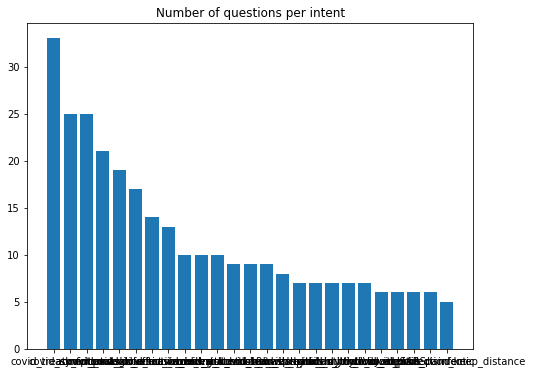

In [145]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(8, 6))
ax.bar(twb_dataset.Intent.value_counts().index, twb_dataset.Intent.value_counts().values)
ax.set_title('Number of questions per intent')
ax.set_xtick(rotation=90)

In [ ]:
twb_dataset.Intent.value_counts().plot.bar(ylim=0)
plt.show()

Now let us train our classifier , we will be using the Multinomial Naives Bayes classifier from sklearn , since we have more than 2 classes in our intent dataset

In [146]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import CountVectorizer

In [147]:
naive_bayes_pipeline = Pipeline([('vect', CountVectorizer(stop_words='english')),
               ('tfidf', TfidfTransformer()),
               ('clf', MultinomialNB()),
              ])

In [148]:
X , Y = twb_dataset.questions_cleanned, twb_dataset.Intent

In [149]:
naive_bayes_pipeline.fit(X, Y)

Pipeline(memory=None,
         steps=[('vect',
                 CountVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.int64'>, encoding='utf-8',
                                 input='content', lowercase=True, max_df=1.0,
                                 max_features=None, min_df=1,
                                 ngram_range=(1, 1), preprocessor=None,
                                 stop_words='english', strip_accents=None,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, vocabulary=None)),
                ('tfidf',
                 TfidfTransformer(norm='l2', smooth_idf=True,
                                  sublinear_tf=False, use_idf=True)),
                ('clf',
                 MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))],
         verbose=False)

once our classifier is fit we can try to predict the intent of one sentence 

In [150]:
naive_bayes_pipeline.predict(['statistic for rwanda'])

array(['ask_for_stats'], dtype='<U30')

In [169]:
naibe_bayes_pipeline.score(X, Y)

0.6148648648648649

In [ ]:
We end up having a model with mean score of 61% which is very small, let us try another metric to evaluate the model...

let us now try to evaluate the model using leave one out cross validation techinic

In [151]:
from sklearn.model_selection import LeaveOneOut
from sklearn.metrics import accuracy_score

In [164]:
X = X.reset_index()
Y = Y.reset_index()

In [165]:
X = X.questions_cleanned
Y = Y.Intent

In [168]:
np.where(Y == 'ask_for_stats')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24]),)

In [167]:
cross_validated = LeaveOneOut()
y_true, y_pred = list(), list()
for train_ix, test_ix in cross_validated.split(X):
    X_train, X_test = X[train_ix], X[test_ix]
    y_train, y_test = Y[train_ix], Y[test_ix]
    naive_bayes_pipeline.fit(X_train, y_train)
    yhat = naive_bayes_pipeline.predict(X_test)  
    y_true.append(y_test[0])
    y_pred.append(yhat[0])
# calculate accuracy
acc = accuracy_score(y_true, y_pred)
print('Accuracy: {}.3f'.fromat(acc))

0    ask_for_stats
Name: Intent, dtype: object ['ask_for_stats']
1    ask_for_stats
Name: Intent, dtype: object ['ask_for_stats']


KeyError: 0